In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
data_test= pd.read_csv('data_for_testing.csv', delimiter=";")
data_from_users= pd.read_csv('data_from_users.csv', delimiter=";")
users_featured= pd.read_csv('users_featured.csv', delimiter=";")

In [4]:
data_test.isna().sum()

user_settings_crypto_unlocked              0
plan                                       0
num_contacts                               0
age                                        0
duration                                   0
total_amount_of_transactions               0
amount_of_transactions_out                 0
min_usd_out                                0
max_usd_out                                0
mean_usd_out                               0
sum_usd_out                                0
amount_of_transactions_in                  0
min_usd_in                                 0
max_usd_in                                 0
mean_usd_in                                0
sum_usd_in                                 0
count_type_atm                             0
count_type_card_payment                    0
count_type_exchange                        0
count_type_fee                             0
count_type_tax                             0
count_type_transfer_out                    0
count_type

In [5]:
data_from_users

,country,user_settings_crypto_unlocked,plan,num_contacts,brands,age,duration,total_amount_of_transactions,amount_of_transactions_out,min_usd_out,...,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds
0,ES,0,STANDARD,3,Apple,27,9,520.0,357.0,0.58,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,LT,1,STANDARD,75,Apple,34,17,133.0,106.0,0.94,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,IE,0,STANDARD,71,Apple,23,7,268.0,225.0,0.04,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,IE,0,STANDARD,219,Apple,38,16,140.0,126.0,1.87,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,GB,0,STANDARD,0,Apple,27,17,50.0,41.0,1.50,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,PL,0,STANDARD,0,Android,22,10,91.0,58.0,0.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15540,PL,0,STANDARD,0,Apple,34,15,10.0,6.0,0.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15541,GB,0,STANDARD,16,Android,41,11,1062.0,983.0,0.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15542,IE,0,PAID,44,Apple,42,17,23.0,13.0,2.13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
users_featured

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,PAID,1.0,1.0,44,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


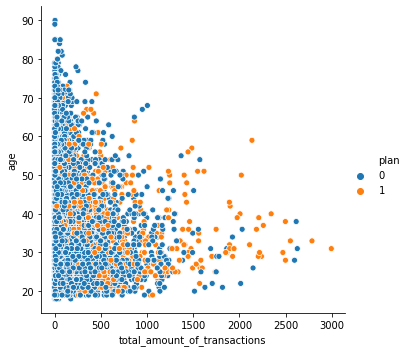

In [7]:
sns.relplot(x="total_amount_of_transactions", y="age", hue="plan", data=data_test)

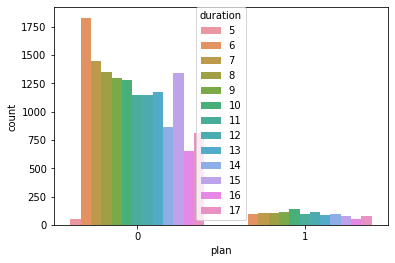

In [8]:
sns.countplot('plan',hue='duration',data=data_test)

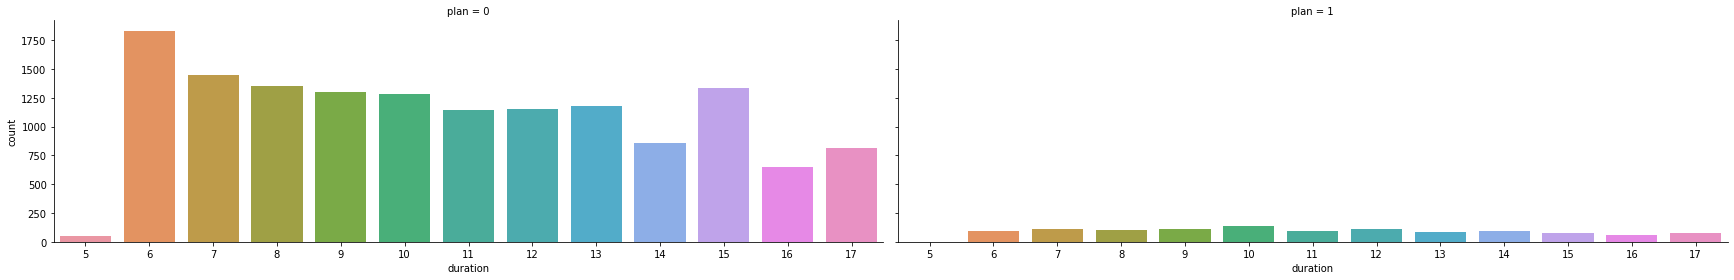

In [9]:
sns.catplot(x="duration", col="plan",
                data=data_test, kind="count",
                height=4, aspect=3)

In [10]:
duration_freqs = pd.crosstab(index=data_test['duration'], columns=data_test['plan'])
duration_freqs.columns=['STANDARD','PAID']
duration_freqs

,STANDARD,PAID
duration,,
5,48,2
6,1830,92
7,1448,107
8,1351,103
9,1298,109
10,1284,137
11,1144,93
12,1150,112
13,1177,89


In [11]:
duration_freqs['percentage_STANDARD'] = duration_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[0] / (x[0] + x[1]), axis=1)
duration_freqs['percentage_PAID'] = duration_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[1] / (x[0] + x[1]), axis=1)
duration_freqs['duration'] = duration_freqs.index
duration_freqs.head()
duration_freqs

,STANDARD,PAID,percentage_STANDARD,percentage_PAID,duration
duration,,,,,
5,48,2,96.000000,4.000000,5
6,1830,92,95.213319,4.786681,6
7,1448,107,93.118971,6.881029,7
8,1351,103,92.916094,7.083906,8
9,1298,109,92.253021,7.746979,9
10,1284,137,90.358902,9.641098,10
11,1144,93,92.481811,7.518189,11
12,1150,112,91.125198,8.874802,12
13,1177,89,92.969984,7.030016,13


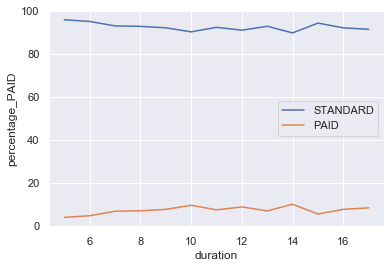

In [12]:
# stylistic command
sns.set()
sns.lineplot(x='duration', y='percentage_STANDARD', data=duration_freqs, label="STANDARD")
sns.lineplot(x='duration', y='percentage_PAID', data=duration_freqs, label="PAID")


In [13]:
user_settings_crypto_unlocked_freqs = pd.crosstab(index=data_test['user_settings_crypto_unlocked'], columns=data_test['plan'])
user_settings_crypto_unlocked_freqs.columns=['STANDARD','PAID']
user_settings_crypto_unlocked_freqs
user_settings_crypto_unlocked_freqs['percentage_STANDARD'] = user_settings_crypto_unlocked_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[0] / (x[0] + x[1]), axis=1)
user_settings_crypto_unlocked_freqs['percentage_PAID'] = user_settings_crypto_unlocked_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[1] / (x[0] + x[1]), axis=1)
user_settings_crypto_unlocked_freqs['user_settings_crypto_unlocked'] = user_settings_crypto_unlocked_freqs.index
user_settings_crypto_unlocked_freqs.head()
user_settings_crypto_unlocked_freqs

,STANDARD,PAID,percentage_STANDARD,percentage_PAID,user_settings_crypto_unlocked
user_settings_crypto_unlocked,,,,,
0,12155,554,95.640884,4.359116,0
1,2239,596,78.977072,21.022928,1


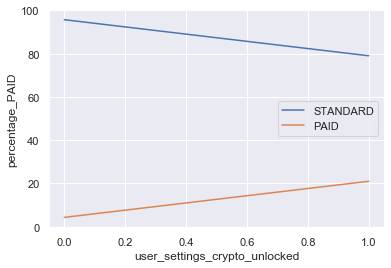

In [14]:
# stylistic command
sns.set()
sns.lineplot(x='user_settings_crypto_unlocked', y='percentage_STANDARD', data=user_settings_crypto_unlocked_freqs, label="STANDARD")
sns.lineplot(x='user_settings_crypto_unlocked', y='percentage_PAID', data=user_settings_crypto_unlocked_freqs, label="PAID")

In [15]:
from sklearn.model_selection import train_test_split

X = data_test.drop(columns=['plan']).values
X_columns = data_test.drop(columns=['plan']).columns
y = data_test['plan'].values

X.shape

(15544, 51)

In [16]:
data_test.shape

(15544, 52)

In [17]:
y.shape

(15544,)

In [18]:
type(y)

numpy.ndarray

In [19]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, stratify=y)
y_ts.shape

(3109,)

Imbalance

In [20]:
target='plan'

0    14394
1     1150
Name: plan, dtype: int64


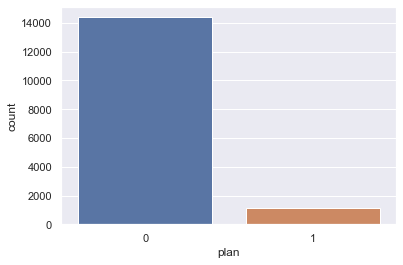

In [21]:
ax=sns.countplot(x= target, data= data_test)
print(data_test['plan'].value_counts())

In [22]:
100* (14394/float(data_test.shape[0]))

92.60164693772516

In [23]:
100*(1150/float(data_test.shape[0]))

7.3983530622748335

In [24]:
from sklearn.metrics import classification_report ,f1_score, roc_auc_score, roc_curve, recall_score , precision_score,accuracy_score , precision_recall_fscore_support

In [25]:
def generate_model_report (y_actual, y_predicted):
    print("Accuracy =", accuracy_score(y_actual, y_predicted))
    print("Recall =", recall_score(y_actual, y_predicted))
    print("Precision =", precision_score(y_actual, y_predicted))
    print("F1 Score =", f1_score(y_actual, y_predicted))
    pass

In [26]:
def generate_auc_roc_curve(clf, X_ts):
    y_pred_proba = clf.predict_proba(X_ts)[:,1]
    fpr ,tpr, thresholds = roc_curve(y_ts, y_pred_proba)
    auc=roc_auc_score(y_ts,y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve=" +str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [30]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_tr, y_tr)
Y_Test_Pred=clf.predict(X_ts)
generate_model_report(y_ts, Y_Test_Pred)

Accuracy = 0.9437118044387263
Recall = 0.2956521739130435
Precision = 0.8395061728395061
F1 Score = 0.43729903536977494


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


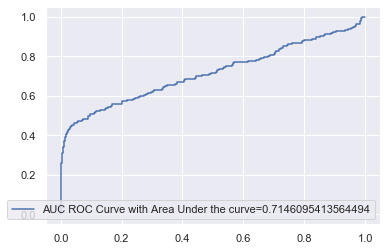

In [28]:
generate_auc_roc_curve(clf, X_ts)

UNDERSAMPLING

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus=RandomUnderSampler()
X_under, y_under = rus.fit_sample(X_tr, y_tr)
ros=RandomOverSampler()
X_over, y_over = rus.fit_sample(X_tr, y_tr)

print('Original dataset:') 
_, c = np.unique(y_tr, return_counts=True) 
print('Total number of examples:', len(y_tr)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nOversampled dataset:') 
_, c = np.unique(y_over, return_counts=True) 
print('Total number of examples:', len(y_over)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nUndersampled dataset:') 
_, c = np.unique(y_under, return_counts=True) 
print('Total number of examples:', len(y_under)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

Original dataset:
Total number of examples: 12435
class 0: 92.60% of total samples
class 1: 7.40% of total samples

Oversampled dataset:
Total number of examples: 1840
class 0: 50.00% of total samples
class 1: 50.00% of total samples

Undersampled dataset:
Total number of examples: 1840
class 0: 50.00% of total samples
class 1: 50.00% of total samples


In [31]:
data_test.plan.value_counts()

0    14394
1     1150
Name: plan, dtype: int64

In [35]:
from sklearn.utils import resample
# Separate majority and minority classes
data_test_majority = data_test[data_test.plan==0]
data_test_minority = data_test[data_test.plan==1]
 
# Upsample minority class
data_test_minority_upsampled = resample(data_test_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=14394,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_test_upsampled = pd.concat([data_test_majority, data_test_minority_upsampled])
 
# Display new class counts
data_test_upsampled.plan.value_counts()

1    14394
0    14394
Name: plan, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

X = data_test_upsampled.drop(columns=['plan']).values
X_columns = data_test_upsampled.drop(columns=['plan']).columns
y = data_test_upsampled['plan'].values

X.shape

(28788, 51)

In [37]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, stratify=y)
y_ts.shape

(5758,)

In [38]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.991


In [39]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
steps = [('over', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.991


LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_tr, y_tr)
lr_pred = log_reg.predict(X_ts)
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, lr_pred)*100))

accuracy: 74.87%


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Other ML algorithms

In [41]:
# Import the relevant algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

# We will use the default arguments for all classifiers
mlp= MLPClassifier()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
var = VarianceThreshold()
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [42]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
sampler = SMOTE()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()


In [43]:
# Train the above classifiers
mlp.fit(X_tr, y_tr)
knn.fit(X_tr, y_tr)
dtc.fit(X_tr, y_tr)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
# Evaluate the classifiers
preds=mlp.predict(X_ts)
print ('Neural Network :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))
preds=knn.predict(X_ts)
print ('k Nearest Neighbors :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))
preds=dtc.predict(X_ts)
print ('Decision Tree :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

Neural Network :  94.72%
k Nearest Neighbors :  91.94%
Decision Tree :  98.82%


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=4)
clf.fit(X_tr, y_tr)
from sklearn.metrics import classification_report , accuracy_score , precision_recall_fscore_support
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 100, 'selector__threshold': 0.4} 

accuracy: 97.36%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2879
           1       0.97      0.98      0.97      2879

    accuracy                           0.97      5758
   macro avg       0.97      0.97      0.97      5758
weighted avg       0.97      0.97      0.97      5758



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=2)
clf.fit(X_tr, y_tr)
from sklearn.metrics import classification_report , accuracy_score , precision_recall_fscore_support
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 20, 'selector__threshold': 0.4} 

accuracy: 99.72%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2879
           1       0.99      1.00      1.00      2879

    accuracy                           1.00      5758
   macro avg       1.00      1.00      1.00      5758
weighted avg       1.00      1.00      1.00      5758



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=2)
clf.fit(X_tr, y_tr)
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 20, 'selector__threshold': 0.4} 

accuracy: 99.74%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2879
           1       0.99      1.00      1.00      2879

    accuracy                           1.00      5758
   macro avg       1.00      1.00      1.00      5758
weighted avg       1.00      1.00      1.00      5758



In [49]:
#from sklearn.pipeline import Pipeline 
#from sklearn.preprocessing import StandardScaler 
#from sklearn.model_selection import GridSearchCV
#knn= KNeighborsClassifier()
#pipe_knn = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', knn)])
#param_grid = {'imputer__strategy': ['mean', 'median'],            
              'knn__n_neighbors': [3, 5, 7, 9, 11, 13]}
#grid = GridSearchCV(pipe, param_grid, cv=5) 
#grid.fit(X_tr, y_tr) 
#grid.best_estimator_

IndentationError: unexpected indent (<ipython-input-49-fbff0d36ac83>, line 6)

In [50]:
var = VarianceThreshold()
rf.fit(X_tr, y_tr)
rf.feature_importances_

array([2.49781901e-02, 8.82680997e-03, 1.26477865e-02, 8.18237112e-03,
       3.73754942e-02, 2.46448622e-02, 1.10756965e-02, 2.41688726e-02,
       1.56178707e-02, 5.22820569e-02, 3.82516830e-02, 3.07289158e-02,
       2.84619832e-02, 1.68623615e-02, 5.29675641e-02, 9.28222727e-03,
       1.48695419e-02, 5.98594851e-03, 2.70081030e-01, 6.08907987e-04,
       1.17086985e-02, 3.37460196e-03, 6.24086392e-02, 1.94483740e-03,
       1.06488826e-02, 4.97935844e-03, 2.44197717e-02, 1.12341830e-02,
       2.54931579e-02, 1.11272238e-03, 2.02650068e-03, 2.15466149e-03,
       1.06606491e-03, 2.64540653e-03, 6.42764495e-03, 1.27792762e-02,
       2.12419210e-03, 2.16032722e-03, 6.47351560e-04, 1.38094108e-02,
       5.89495106e-04, 1.04761957e-03, 2.82026537e-03, 1.07300770e-03,
       4.83309592e-03, 2.46213642e-02, 7.06225293e-02, 2.94569788e-04,
       8.57256275e-05, 1.54906707e-03, 1.39739615e-03])

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

sampler = SMOTE()

In [53]:
#for c, imp in sorted(zip(X_columns, rf.feature_importances_), key=lambda pair: pair[1], reverse=True):
 # print('{:20}: {}'.format(c, imp))

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
steps = [('under', RandomUnderSampler()), ('model', mlp)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import  MLPClassifier
mlp=MLPClassifier()
pipe_mlp = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mlp)])


grid1 = {'selector__threshold': [0, 0.05, 0.1],
         'model__n_estimators': [20, 50, 100]}
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)
print(clf_mlp.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_mlp)*100))

print(classification_report(y_ts, preds_mlp))
best_clf_mlp = clf_mlp.best_estimator_

In [ ]:
from sklearn.neural_network import  MLPClassifier
mlp=MLPClassifier()
pipe_mlp = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mlp)])

grid_mlp = {'selector__threshold': [0, 0.2, 0.4],
            'model__hidden_layer_sizes': [(10,), (20,), (50,), (100,), (200,)],
            'model__activation' : ['identity', 'logistic', 'tanh', 'relu']}

clf_mlp = GridSearchCV(pipe_mlp, grid_mlp, cv=3)
clf_mlp.fit(X_tr, y_tr)

In [ ]:
preds_mlp=clf_mlp.predict(X_ts)
print(clf_mlp.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_mlp)*100))

print(classification_report(y_ts, preds_mlp))
best_clf_mlp = clf_mlp.best_estimator_

In [ ]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.preprocessing import StandardScaler

#gaus=GaussianNB()

#pipe_Gauss = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', gaus)])

#grid_Gauss = {'selector__threshold': [0, 0.2, 0.3],
         'model__n_estimators': (priors=None, var_smoothing=1e-09)}

#clf = GridSearchCV(pipe_Gauss, grid_Gauss,cv=3)
#clf.fit(X_tr, y_tr)
#preds=clf.predict(X_ts)
#print(clf.best_params_, '\n')
#print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

#print(classification_report(y_ts, preds))

In [ ]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
preds_RF=RF.predict(X_ts)
round(RF.score(X,y), 4)

In [ ]:
#from sklearn.metrics import accuracy_score, log_loss
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC, NuSVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#classifiers = [
 #   KNeighborsClassifier(3),
  #  SVC(kernel="rbf", C=0.025, probability=True),
   # DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier()]
#for classifier in classifiers:
 #   pipe_all = Pipeline(steps=[('classifier', classifier)])
  #  pipe_all.fit(X_tr, y_tr)   
    
   # print(classifier)
    #print("model score: %.2f" % pipe_all.score(X_ts, y_ts))


In [ ]:
param_test1 = {'n_estimators':range(70,90,10)}
clf_gbc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=2,max_depth=100,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
clf_gbc.fit(X_tr,y_tr)
preds_gbc=clf_gbc.predict(X_ts)
print(clf_gbc.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_gbc)*100))

print(classification_report(y_ts, preds_gbc))
best_clf_gbc = clf_gbc.best_estimator_